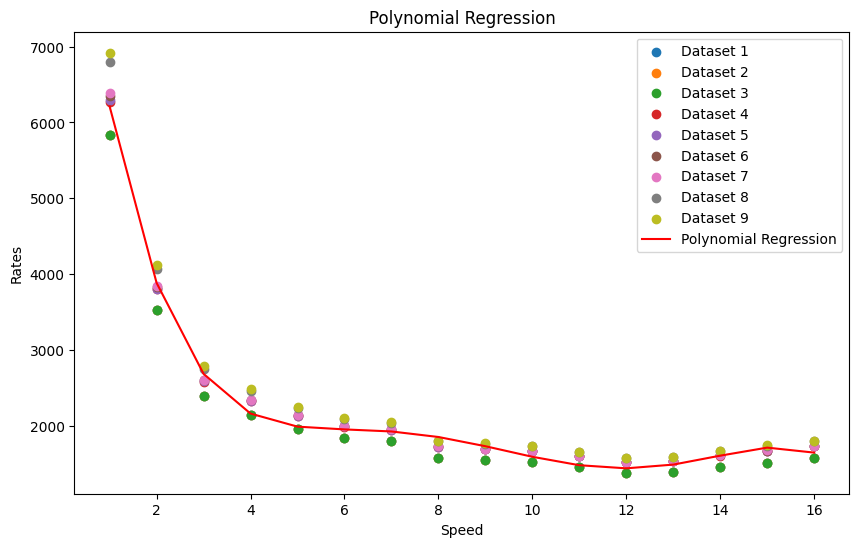

 Speed  Predicted CO2
     1    6211.110569
     2    3883.502124
     3    2683.632116
     4    2159.883829
     5    1987.781121
     6    1951.298604
     7    1924.171829
     8    1851.207467
     9    1729.593489
    10    1590.209356
    11    1478.936191
    12    1437.966968
    13    1487.116694
    14    1605.132587
    15    1711.004264
    16    1645.273918


In [56]:
#working well

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

# Read datasets from Excel files
#file_paths = ["dataset1.xlsx", "dataset2.xlsx", "dataset3.xlsx", "dataset4.xlsx"]
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)  # Assuming the column name for rates is 'rate'

# Define the data for all datasets
#speed = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Fit polynomial regression model with a higher degree polynomial
poly_degree = 5  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(all_speed)

model = LinearRegression()
model.fit(X_poly, all_rates)

# Predict using the model
y_pred = model.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 6))

for i, _ in enumerate(rates_datasets):
    plt.scatter(speed, rates_datasets[i], label=f'Dataset {i+1}')

plt.plot(np.sort(all_speed, axis=0), y_pred[np.argsort(all_speed, axis=0)][:,0], color='red', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Rates')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model
y_pred_speed = model.predict(poly_features.transform(speed))

# Create a DataFrame with only the predicted CO2 values for the unique speed values
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted CO2': y_pred_speed.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))


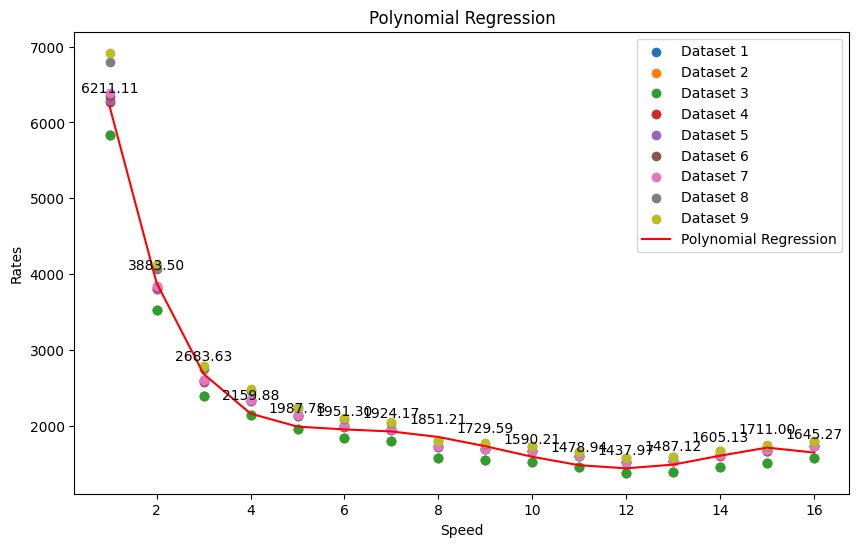

 Speed  Predicted CO2
     1    6211.110569
     2    3883.502124
     3    2683.632116
     4    2159.883829
     5    1987.781121
     6    1951.298604
     7    1924.171829
     8    1851.207467
     9    1729.593489
    10    1590.209356
    11    1478.936191
    12    1437.966968
    13    1487.116694
    14    1605.132587
    15    1711.004264
    16    1645.273918


In [61]:
# working well with printed values

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

# Read datasets from Excel files
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)  # Assuming the column name for rates is 'Co2'

# Define the data for all datasets
#speed = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]).reshape(-1, 1)
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Fit polynomial regression model with a higher degree polynomial
poly_degree = 5  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(all_speed)

model = LinearRegression()
model.fit(X_poly, all_rates)

# Predict using the model
y_pred = model.predict(X_poly)

# Plot the results
plt.figure(figsize=(10, 6))

for i, _ in enumerate(rates_datasets):
    plt.scatter(speed, rates_datasets[i], label=f'Dataset {i+1}')

plt.plot(np.sort(all_speed, axis=0), y_pred[np.argsort(all_speed, axis=0)][:,0], color='red', label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Speed')
plt.ylabel('Rates')
plt.legend()

# Predict CO2 values for speed using the model
y_pred_speed = model.predict(poly_features.transform(speed))

# Annotate points with predicted CO2 values
for i in range(len(speed)):
    plt.annotate(f'{y_pred_speed[i]:.2f}', (speed[i], y_pred_speed[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

# Create a DataFrame with only the predicted CO2 values for the unique speed values
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted CO2': y_pred_speed.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))
